<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span><ul class="toc-item"><li><span><a href="#Gini-Impurity" data-toc-modified-id="Gini-Impurity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gini Impurity</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Gini-Index" data-toc-modified-id="Gini-Index-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gini Index</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Neural-network" data-toc-modified-id="Neural-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Neural network</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pydicom
from sklearn.metrics import roc_auc_score
from copy import deepcopy

In [2]:
df = pd.read_csv('/Users/rt/Desktop/College/4th year/sem 7/Project/code/Texture_Features/segment_1.csv')
display(df)

,Angles & Distance,Contrast,Dissimilarity,Homogeneity,ASM,Energy,Correlation
0,0 (d = 1),313.348604,3.046477,0.894390,0.784734,0.885852,0.876446
1,45 (d = 1),388.209987,3.834360,0.891348,0.782752,0.884733,0.847196
2,90 (d = 1),309.012521,3.029920,0.894020,0.784660,0.885810,0.878155
3,135 (d = 1),376.354954,3.726135,0.891808,0.783768,0.885307,0.851863
4,0 (d = 2),436.290587,4.380806,0.889702,0.782094,0.884361,0.828272
5,45 (d = 2),388.209987,3.834360,0.891348,0.782752,0.884733,0.847196
6,90 (d = 2),440.774877,4.412485,0.889526,0.781945,0.884276,0.826507
7,135 (d = 2),376.354954,3.726135,0.891808,0.783768,0.885307,0.851863
8,0 (d = 3),502.338577,5.077580,0.887156,0.779508,0.882898,0.802623
9,45 (d = 3),520.636747,5.219223,0.886481,0.778331,0.882231,0.795792


In [3]:
display(df)

,Angles & Distance,Contrast,Dissimilarity,Homogeneity,ASM,Energy,Correlation
0,0 (d = 1),313.348604,3.046477,0.894390,0.784734,0.885852,0.876446
1,45 (d = 1),388.209987,3.834360,0.891348,0.782752,0.884733,0.847196
2,90 (d = 1),309.012521,3.029920,0.894020,0.784660,0.885810,0.878155
3,135 (d = 1),376.354954,3.726135,0.891808,0.783768,0.885307,0.851863
4,0 (d = 2),436.290587,4.380806,0.889702,0.782094,0.884361,0.828272
5,45 (d = 2),388.209987,3.834360,0.891348,0.782752,0.884733,0.847196
6,90 (d = 2),440.774877,4.412485,0.889526,0.781945,0.884276,0.826507
7,135 (d = 2),376.354954,3.726135,0.891808,0.783768,0.885307,0.851863
8,0 (d = 3),502.338577,5.077580,0.887156,0.779508,0.882898,0.802623
9,45 (d = 3),520.636747,5.219223,0.886481,0.778331,0.882231,0.795792


In [4]:
from os import listdir
from os.path import isfile, join
mypath = '/Users/rt/Desktop/College/4th year/sem 7/Project/code/Texture_Features/'
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])
df = pd.read_csv(mypath + onlyfiles[0])
del onlyfiles[0]

In [5]:
for i in onlyfiles:
    df1 = pd.read_csv(mypath + i)
    df = pd.concat([df,df1], ignore_index = True)

In [6]:
temp = df.columns.values.tolist()
x = temp.pop()
temp.insert(0, x)
df = df[temp]
df.drop(columns = ['Angles & Distance','ASM'], inplace = True)

In [7]:
display(df)

,Correlation,Contrast,Dissimilarity,Homogeneity,Energy
0,0.876446,313.348604,3.046477,0.894390,0.885852
1,0.847196,388.209987,3.834360,0.891348,0.884733
2,0.878155,309.012521,3.029920,0.894020,0.885810
3,0.851863,376.354954,3.726135,0.891808,0.885307
4,0.828272,436.290587,4.380806,0.889702,0.884361
...,...,...,...,...,...
67,0.592759,4.859157,0.047128,0.999101,0.999077
68,0.358865,7.665014,0.070965,0.998990,0.998979
69,0.425858,6.877493,0.064260,0.999024,0.999016
70,0.388369,7.312285,0.068440,0.998997,0.998983


In [8]:
y = []
for i in range(df.shape[0]):
    if i <=12:
        y.append(1)
    elif i >12 and i<=24:
        y.append(0)
    elif i>24 and i<=36:
        y.append(1)
    elif i>36 and i<=48:
        y.append(0)
    elif i>48 and i<=60:
        y.append(1)
    elif i>60 and i <=72:
        y.append(0)

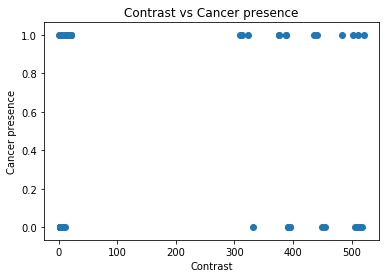

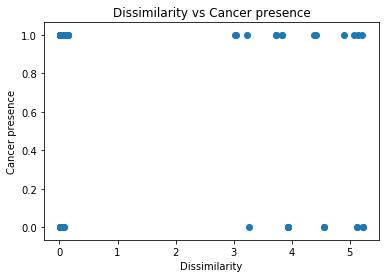

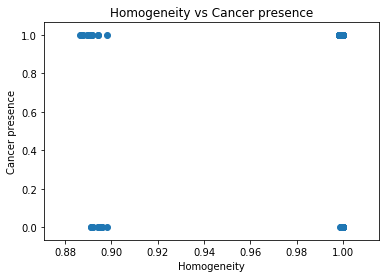

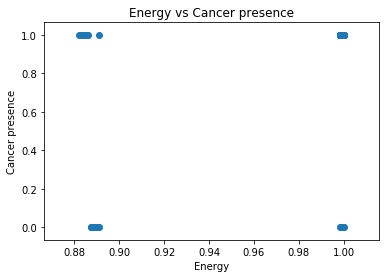

In [9]:
temp = df.columns.values.tolist()
del temp[0]
for i in temp:
    x = df[i]
    plt.scatter(x, y)
    plt.xlabel(i)
    plt.ylabel('Cancer presence')
    plt.title('%s vs Cancer presence'%i)
    plt.show()

In [10]:
display(df)

,Correlation,Contrast,Dissimilarity,Homogeneity,Energy
0,0.876446,313.348604,3.046477,0.894390,0.885852
1,0.847196,388.209987,3.834360,0.891348,0.884733
2,0.878155,309.012521,3.029920,0.894020,0.885810
3,0.851863,376.354954,3.726135,0.891808,0.885307
4,0.828272,436.290587,4.380806,0.889702,0.884361
...,...,...,...,...,...
67,0.592759,4.859157,0.047128,0.999101,0.999077
68,0.358865,7.665014,0.070965,0.998990,0.998979
69,0.425858,6.877493,0.064260,0.999024,0.999016
70,0.388369,7.312285,0.068440,0.998997,0.998983


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
display(df)

,Correlation,Contrast,Dissimilarity,Homogeneity,Energy
0,0.876446,313.348604,3.046477,0.894390,0.885852
1,0.847196,388.209987,3.834360,0.891348,0.884733
2,0.878155,309.012521,3.029920,0.894020,0.885810
3,0.851863,376.354954,3.726135,0.891808,0.885307
4,0.828272,436.290587,4.380806,0.889702,0.884361
...,...,...,...,...,...
67,0.592759,4.859157,0.047128,0.999101,0.999077
68,0.358865,7.665014,0.070965,0.998990,0.998979
69,0.425858,6.877493,0.064260,0.999024,0.999016
70,0.388369,7.312285,0.068440,0.998997,0.998983


In [13]:
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [16]:
model = LogisticRegression(solver = 'liblinear', C = 0.05, 
                           multi_class = 'ovr', random_state = 0)

In [17]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
x_test = scaler.transform(x_test)

In [19]:
y_pred = model.predict(x_test)

In [20]:
# accuracy on training set
model.score(x_train, y_train)

0.56

In [21]:
# Accuracy on testing set
model.score(x_test, y_test)

0.4090909090909091

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1],
       [12,  2]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.67      0.14      0.24        14

    accuracy                           0.41        22
   macro avg       0.52      0.51      0.38        22
weighted avg       0.56      0.41      0.34        22



# Decision Tree Algorithm

## Gini Impurity

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [25]:
decision_tree = DecisionTreeClassifier()

In [26]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

Model accuracy :  1.0


[Text(581.25, 849.375, 'X[4] <= -1.181\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(465.0, 736.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(697.5, 736.125, 'X[4] <= 0.859\ngini = 0.439\nsamples = 40\nvalue = [27, 13]'),
 Text(581.25, 622.875, 'X[0] <= 1.195\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(465.0, 509.625, 'X[0] <= -0.032\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(348.75, 396.375, 'X[2] <= -0.809\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(232.5, 283.125, 'X[0] <= -0.316\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(116.25, 169.875, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(348.75, 169.875, 'X[0] <= -0.212\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(232.5, 56.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(465.0, 56.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(465.0, 283.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(581.25, 396.375, 'gini = 0.0\nsamples = 13\nvalue = [13, 

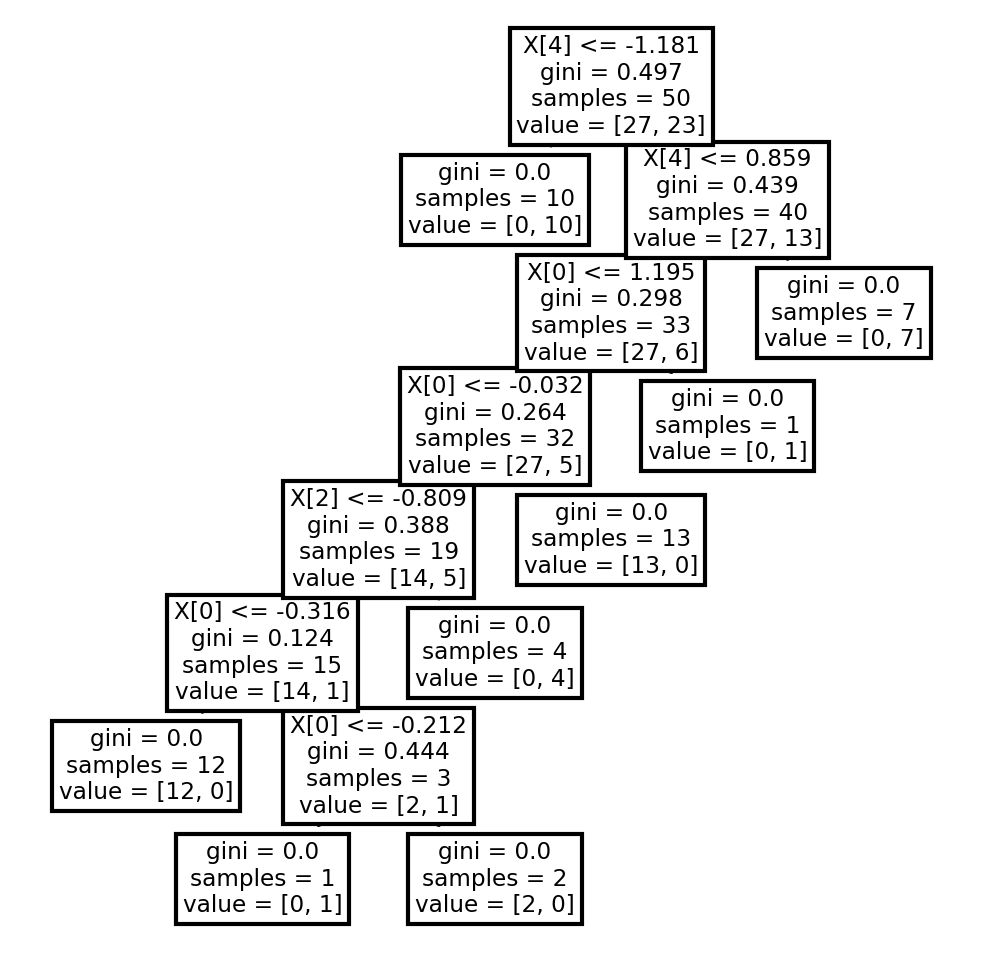

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [29]:
val = decision_tree.predict(x_test)

In [30]:
print('Predicted Values : ', val)
print('Original Values : ', y_test)

Predicted Values :  [0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1]
Original Values :  [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [31]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

Accuracy on testing data :  0.9090909090909091


In [32]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

Confusion Matrix : 
[[ 7  1]
 [ 1 13]]


## Entropy

In [33]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

In [34]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

Model accuracy :  1.0


[Text(372.0, 841.2857142857143, 'X[4] <= -1.181\nentropy = 0.995\nsamples = 50\nvalue = [27, 23]'),
 Text(186.0, 711.8571428571429, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(558.0, 711.8571428571429, 'X[4] <= 0.859\nentropy = 0.91\nsamples = 40\nvalue = [27, 13]'),
 Text(372.0, 582.4285714285714, 'X[1] <= -0.835\nentropy = 0.684\nsamples = 33\nvalue = [27, 6]'),
 Text(186.0, 453.00000000000006, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(558.0, 453.00000000000006, 'X[2] <= 0.677\nentropy = 0.845\nsamples = 22\nvalue = [16, 6]'),
 Text(372.0, 323.57142857142867, 'X[3] <= 0.832\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(186.0, 194.14285714285722, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(558.0, 194.14285714285722, 'X[2] <= -0.827\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(372.0, 64.71428571428578, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(744.0, 64.71428571428578, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(744

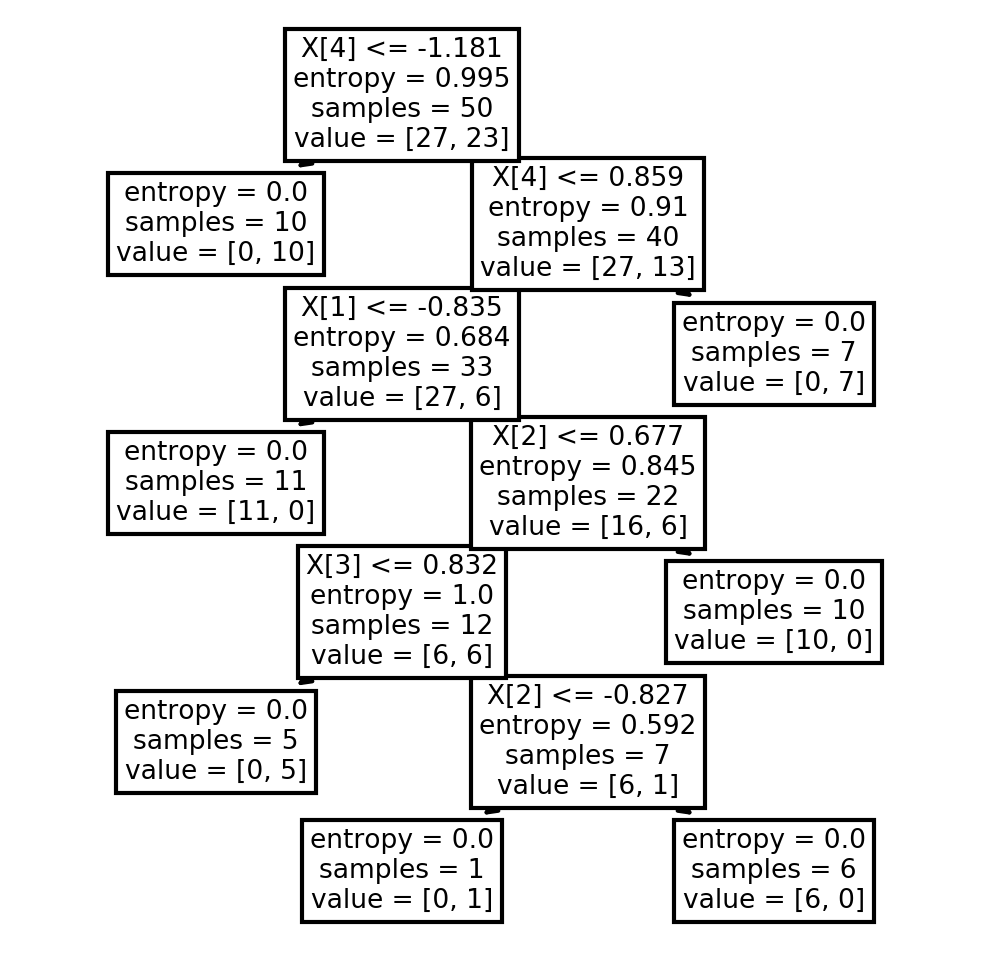

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [37]:
val = decision_tree.predict(x_test)
print('Predicted Values : ', val)
print('Original Values : ', y_test)

Predicted Values :  [0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1]
Original Values :  [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [38]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

Accuracy on testing data :  0.9090909090909091


In [39]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

Confusion Matrix : 
[[ 7  1]
 [ 1 13]]


# Random Forest Classifier

## Gini Index

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [42]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

Accuracy on testing data :  0.8636363636363636


In [44]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

Confusion matrix : 
[[ 7  1]
 [ 2 12]]


## Entropy

In [45]:
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [46]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

Accuracy on testing data :  0.8636363636363636


In [48]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

Confusion matrix : 
[[ 7  1]
 [ 2 12]]


# Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC(kernel = 'poly')

In [51]:
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
print('Predicted values for SVM Classifier : ',svm.predict(x_test))

Predicted values for SVM Classifier :  [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [53]:
print('Accuracy of Support Vector Machine : ', svm.score(x_test, y_test))

Accuracy of Support Vector Machine :  0.4090909090909091


# Neural network

In [54]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [55]:
classifier = Sequential()

In [56]:
classifier.add(Dense(4, activation = 'relu', 
                     kernel_initializer = 'random_normal', 
                     input_dim = 5))

In [57]:
classifier.add(Dense(4, activation = 'relu',
                    kernel_initializer = 'random_normal'))

In [58]:
classifier.add(Dense(1, activation = 'sigmoid',
                    kernel_initializer = 'random_normal'))

In [59]:
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [60]:
classifier.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
50/50 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4000
Epoch 2/100
50/50 [==============================] - 0s 346us/step - loss: 0.6931 - accuracy: 0.5400
Epoch 3/100
50/50 [==============================] - 0s 338us/step - loss: 0.6931 - accuracy: 0.5400
Epoch 4/100
50/50 [==============================] - 0s 316us/step - loss: 0.6930 - accuracy: 0.5400
Epoch 5/100
50/50 [==============================] - 0s 327us/step - loss: 0.6929 - accuracy: 0.5400
Epoch 6/100
50/50 [==============================] - 0s 315us/step - loss: 0.6929 - accuracy: 0.5400
Epoch 7/100
50/50 [==============================] - 0s 318us/step - loss: 0.6928 - accuracy: 0.5400
Epoch 8/100
50/50 [==============================] - 0s 322us/step - loss: 0.6927 - accuracy: 0.5400
Epoch 9/100
50/50 [==============================] - 0s 313us/step - loss: 0.6926 - accuracy: 0.5400
Epoch 10/100
50/50 [==============================] - 0s 315us/step - loss: 0.6927 - accurac

In [61]:
model_eval = classifier.evaluate(x_train, y_train)

50/50 [==============================] - 0s 2ms/step


In [62]:
print('Accuracy on training set : ', 
      classifier.evaluate(x_train, y_train)[1])
print()
print('Accuracy on Testing set : ', 
      classifier.evaluate(x_train, y_train)[0])

50/50 [==============================] - 0s 50us/step
Accuracy on training set :  0.5400000214576721
50/50 [==============================] - 0s 48us/step
Accuracy on Testing set :  0.6822479081153869


In [63]:
y_pred = classifier.predict(x_test)

In [64]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

In [65]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix : 
[[ 8  0]
 [14  0]]
